ME 2016 - Nonlinear Dynamical Systems 1

Homework 3

**Dane Sabo**

In [1]:
import sympy as sm
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import *

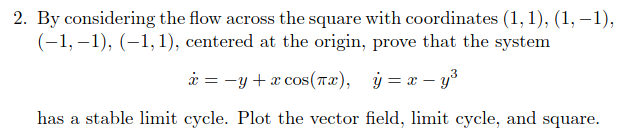

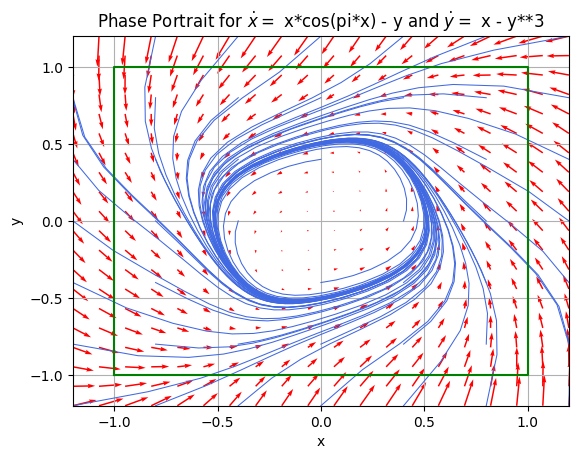

In [2]:
x, y = sm.symbols('x,y')
xdot = -y + x*sm.cos(sm.pi*x)
ydot = x - y**3

#Create Functions
P = lambda x, y: -y + x*np.cos(np.pi*x)
Q = lambda x, y: x - y**3
def dX_dt(X, t, args = (P,Q)):
    return [P(X[0], X[1]), Q(X[0], X[1])]

#Initial Conditions
ts = np.linspace(0, 5, 30)
ic = np.linspace(-1.2, 1.2, 7)

#Make a vectorfield
X, Y = np.mgrid[ic[0]:ic[-1]:20j, ic[0]:ic[-1]:20j]
u = P(X,Y)
v = Q(X,Y)
plt.quiver(X, Y, u, v, color = 'red')

#plot trajectories
plt.title(f'Phase Portrait for $\\dot x = $ {xdot} and $\\dot y = $ {ydot}')
plt.xlabel('x'); plt.ylabel('y'); plt.grid('both')
plt.xlim((ic[0],ic[-1])); plt.ylim((ic[0],ic[-1]))

for r in ic:
    for s in ic:
        X0 = [r,s]
        Xs = odeint(dX_dt,X0,ts)
        plt.plot(Xs[:,0],Xs[:,1], "royalblue",linewidth = 0.75)
rect = np.array([[-1, -1], [-1, 1], [1, 1], [1, -1], [-1, -1]])
plt.plot(rect[:,0], rect[:,1], '-g')


In [3]:
#Guess a psi for Poincare - Bendixson Theorem
psi = 1
def sign_change_test(xdot, ydot, psi):
    div_psiX = sm.diff(psi*xdot,x) + sm.diff(psi*ydot, y)
    print(f'dV/dt Expression: \n{div_psiX}')
    print(f'\ndV/dt Simplified:\n{sm.simplify(div_psiX)}\n')
    
    sign_changes = sm.solve(sm.Eq(0,div_psiX),x,y)
    print(f'Sign Changes: \n{sign_changes}')
    return div_psiX

expr = sign_change_test(xdot, ydot, psi)

dV/dt Expression: 
-pi*x*sin(pi*x) - 3*y**2 + cos(pi*x)

dV/dt Simplified:
-pi*x*sin(pi*x) - 3*y**2 + cos(pi*x)

Sign Changes: 
[(x, -sqrt(-3*pi*x*sin(pi*x) + 3*cos(pi*x))/3), (x, sqrt(-3*pi*x*sin(pi*x) + 3*cos(pi*x))/3)]


In [4]:
expr.subs(x,-1)
#This is clearly always < 0. No sign change

-3*y**2 - 1

In [5]:
expr.subs(y,-1)

-pi*x*sin(pi*x) + cos(pi*x) - 3

In [6]:
expr.subs(x,1)

-3*y**2 - 1

In [7]:
expr.subs(y,1)

-pi*x*sin(pi*x) + cos(pi*x) - 3

Text(0, 0.5, 'y')

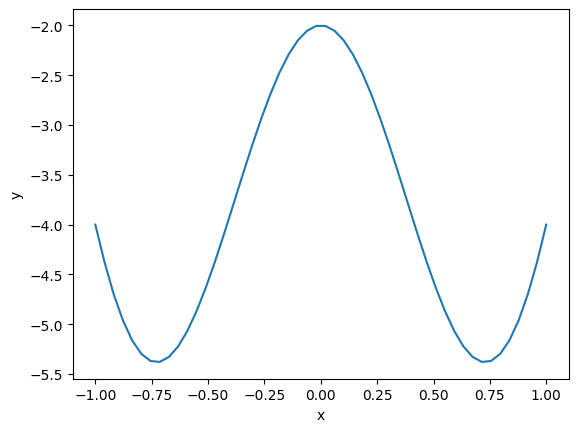

In [8]:
#Let's check graphically the range of -pi*x*sin(pi*x) + cos(pi*x) - 3
x_range = np.linspace(-1,1,50)
y_range = -np.pi*x_range*np.sin(np.pi*x_range) + np.cos(np.pi*x_range) - 3
plt.figure()
plt.plot(x_range,y_range)
plt.xlabel('x')
plt.ylabel('y')

#Looks like no sign change for our domain of -1<x<1

In [9]:
expr.subs(x,-0.1)

-3*y**2 - 0.1*pi*sin(0.1*pi) + cos(0.1*pi)

In [10]:
expr.subs(x,0.1)

-3*y**2 - 0.1*pi*sin(0.1*pi) + cos(0.1*pi)

In [11]:
expr.subs(y,-0.1)

-pi*x*sin(pi*x) + cos(pi*x) - 0.03

In [12]:
expr.subs(y,0.1)

-pi*x*sin(pi*x) + cos(pi*x) - 0.03

Text(0, 0.5, 'Range (y or x)')

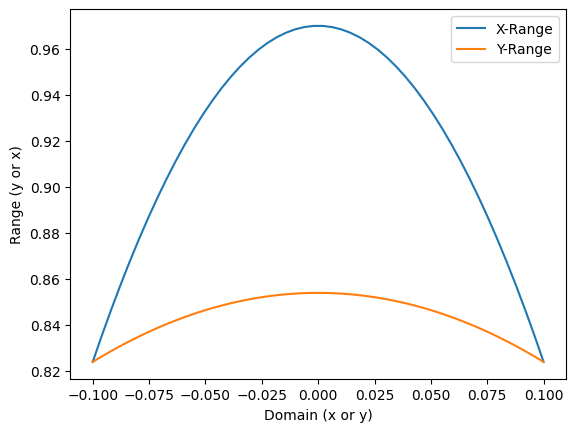

In [13]:
#Let's check graphically the range of -pi*x*sin(pi*x) + cos(pi*x) - 3
the_range = np.linspace(-0.1,0.1,50)
y_range = -3*the_range**2 - 0.1*np.pi*np.sin(0.1*np.pi)+np.cos(0.1*np.pi)
x_range = -np.pi*the_range*np.sin(np.pi*the_range)+np.cos(np.pi*the_range)-0.03
plt.figure()
plt.plot(the_range,x_range, the_range, y_range)
plt.legend(['X-Range', 'Y-Range'])
plt.xlabel('Domain (x or y)')
plt.ylabel('Range (y or x)')

#Looks like no sign change for our domain of -1<x<1, always positive (towards limit cycle)

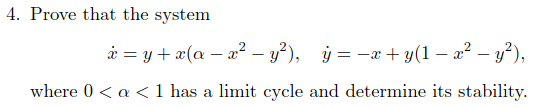

In [14]:
alpha, x, y = sm.symbols('alpha, x, y')
P = y + x*(alpha - x**2 - y**2)
Q = -x + y*(1-x**2-y**2)

Peqn = sm.Eq(P, 0)
Qeqn = sm.Eq(Q, 0)

criticalpoints = sm.solve((Peqn,Qeqn),x,y)
display(criticalpoints)

[(0, 0),
 (sqrt(2)*sqrt((alpha - sqrt(alpha**2 - 2*alpha - 3) + 1)/(alpha - 1))*(-alpha - sqrt(alpha**2 - 2*alpha - 3) + 1)/4,
  sqrt(alpha/(2*alpha - 2) - sqrt(alpha**2 - 2*alpha - 3)/(2*alpha - 2) + 1/(2*alpha - 2))),
 (sqrt(2)*sqrt((alpha - sqrt(alpha**2 - 2*alpha - 3) + 1)/(alpha - 1))*(alpha + sqrt(alpha**2 - 2*alpha - 3) - 1)/4,
  -sqrt(alpha/(2*alpha - 2) - sqrt(alpha**2 - 2*alpha - 3)/(2*alpha - 2) + 1/(2*alpha - 2))),
 (sqrt(2)*sqrt((alpha + sqrt(alpha**2 - 2*alpha - 3) + 1)/(alpha - 1))*(-alpha + sqrt(alpha**2 - 2*alpha - 3) + 1)/4,
  sqrt(alpha/(2*alpha - 2) + sqrt(alpha**2 - 2*alpha - 3)/(2*alpha - 2) + 1/(2*alpha - 2))),
 (sqrt(2)*sqrt((alpha + sqrt(alpha**2 - 2*alpha - 3) + 1)/(alpha - 1))*(alpha - sqrt(alpha**2 - 2*alpha - 3) - 1)/4,
  -sqrt(alpha/(2*alpha - 2) + sqrt(alpha**2 - 2*alpha - 3)/(2*alpha - 2) + 1/(2*alpha - 2)))]

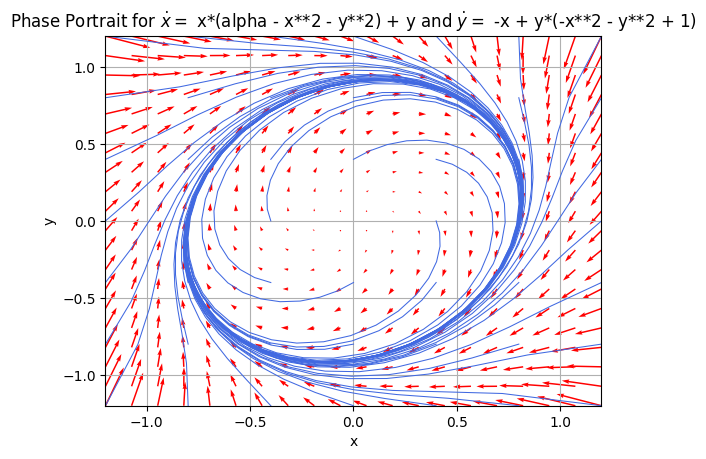

In [15]:
xdot = P
ydot = Q
alpha_val = 0.5

#Create Functions
P = lambda x, y: y + x*(alpha_val - x**2 - y**2)
Q = lambda x, y: -x + y*(1 - x**2 - y**2)
def dX_dt(X, t, args = (P,Q)):
    return [P(X[0], X[1]), Q(X[0], X[1])]

#Initial Conditions
ts = np.linspace(0, 5, 30)
ic = np.linspace(-1.2, 1.2, 7)

#Make a vectorfield
X, Y = np.mgrid[ic[0]:ic[-1]:20j, ic[0]:ic[-1]:20j]
u = P(X,Y)
v = Q(X,Y)
plt.quiver(X, Y, u, v, color = 'red')

#plot trajectories
plt.title(f'Phase Portrait for $\\dot x = $ {xdot} and $\\dot y = $ {ydot}')
plt.xlabel('x'); plt.ylabel('y'); plt.grid('both')
plt.xlim((ic[0],ic[-1])); plt.ylim((ic[0],ic[-1]))

for r in ic:
    for s in ic:
        X0 = [r,s]
        Xs = odeint(dX_dt,X0,ts)
        plt.plot(Xs[:,0],Xs[:,1], "royalblue",linewidth = 0.75)



From calculating the algabraeic expressions for the critical points and looking at the plot, it's pretty clear there is one critical point inside the potential limit cycle and the rest are outside of the potential limit cycle. 

It also looks like this limit cycle is **stable**. That is because the vectors point in towards the limit cycle. Let me prove this:

In [16]:
#Guess a psi for Poincare - Bendixson Theorem
psi = 1
def sign_change_test(xdot, ydot, psi):
    div_psiX = sm.diff(psi*xdot,x) + sm.diff(psi*ydot, y)
    print(f'dV/dt Expression: \n{div_psiX}')
    print(f'\ndV/dt Simplified:\n{sm.simplify(div_psiX)}\n')
    
    sign_changes = sm.solve(sm.Eq(0,div_psiX),x,y)
    print(f'Sign Changes: \n{sign_changes}')
    return div_psiX

expr = sign_change_test(xdot, ydot, psi)

dV/dt Expression: 
alpha - 4*x**2 - 4*y**2 + 1

dV/dt Simplified:
alpha - 4*x**2 - 4*y**2 + 1

Sign Changes: 
[(-sqrt(alpha - 4*y**2 + 1)/2, y), (sqrt(alpha - 4*y**2 + 1)/2, y)]


Now let me draw a rectangle around this limit cycle the same as the last problem. A rectangle at points (-1, -1), (-1, 1), (1, -1), (1, 1), and a smaller internal rectangle at (-0.1, -0.1), (-0.1, 0.1), (0.1, 0.1), (0.1, -0.1). 

In [17]:
expr.subs(x,-1)
#This is clearly always < 0. No sign change

alpha - 4*y**2 - 3

In [18]:
expr.subs(y,-1)

alpha - 4*x**2 - 3

In [19]:
expr.subs(x,1)

alpha - 4*y**2 - 3

In [20]:
expr.subs(y,1)

alpha - 4*x**2 - 3

For $0 < \alpha < 1$ these are all clearly always negative.

In [21]:
expr.subs(x,-0.1)

alpha - 4*y**2 + 0.96

In [22]:
expr.subs(x,0.1)

alpha - 4*y**2 + 0.96

In [23]:
expr.subs(y,-0.1)

alpha - 4*x**2 + 0.96

In [24]:
expr.subs(y,0.1)

alpha - 4*x**2 + 0.96

For x or y = 0.1, it's clear this is always positive for $ 0 < \alpha < 1 $.
As a result, there must be a limit cycle between these two rectangles that is stable, as flow enters the region on all boundaries.

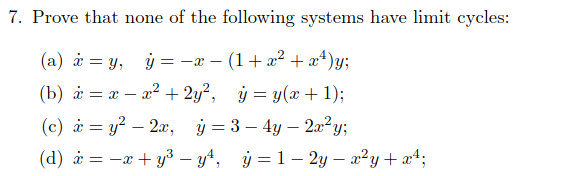

**Problem A**

In [25]:
xdot = y
ydot = -x - (1+x**2+x**4)*y
zeta = 1
fun = sm.simplify(sm.diff(zeta*xdot,x) + sm.diff(zeta*ydot,y))
fun

-x**4 - x**2 - 1

This function cannot change sign for all real numbers. Therefore, there is no limit cycle in the 2d plane.

**Problem B**

In [26]:
xdot = x - x**2 + 2*y**2
ydot = y*(x+1)

zeta = 1

fun = sm.simplify(sm.diff(zeta*xdot,x) + sm.diff(zeta*ydot,y))
fun

2 - x

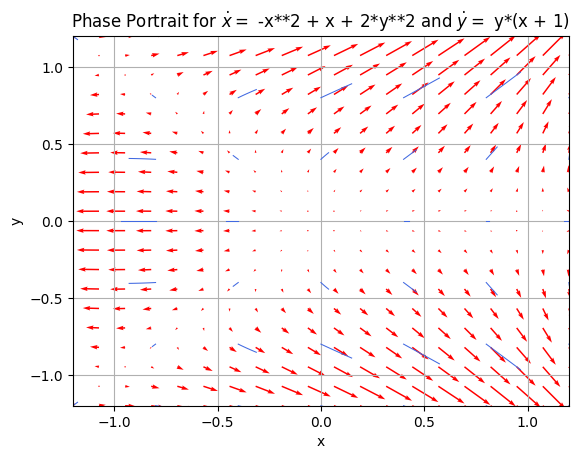

In [27]:
#Create Functions
P = lambda x, y: x - x**2 + 2*y**2
Q = lambda x, y: y*(x+1)
def dX_dt(X, t, args = (P,Q)):
    return [P(X[0], X[1]), Q(X[0], X[1])]

#Initial Conditions
ts = np.linspace(0, 0.1, 30)
ic = np.linspace(-1.2, 1.2, 7)

#Make a vectorfield
X, Y = np.mgrid[ic[0]:ic[-1]:20j, ic[0]:ic[-1]:20j]
u = P(X,Y)
v = Q(X,Y)
plt.quiver(X, Y, u, v, color = 'red')

#plot trajectories
plt.title(f'Phase Portrait for $\\dot x = $ {xdot} and $\\dot y = $ {ydot}')
plt.xlabel('x'); plt.ylabel('y'); plt.grid('both')
plt.xlim((ic[0],ic[-1])); plt.ylim((ic[0],ic[-1]))

for r in ic:
    for s in ic:
        X0 = [r,s]
        Xs = odeint(dX_dt,X0,ts)
        plt.plot(Xs[:,0],Xs[:,1], "royalblue",linewidth = 0.75)
    

Now we know we can't just use Bendixson's criterion. But! The x axis looks invariant. Let's take a closer look.

In [28]:
#Guess a psi for Poincare - Bendixson Theorem
psi = 1
def sign_change_test(xdot, ydot, psi):
    div_psiX = sm.diff(psi*xdot,x) + sm.diff(psi*ydot, y)
    print(f'dV/dt Expression: \n{div_psiX}')
    print(f'\ndV/dt Simplified:\n{sm.simplify(div_psiX)}\n')
    
    sign_changes = sm.solve(sm.Eq(0,div_psiX),x,y)
    print(f'Sign Changes: \n{sign_changes}')
    return div_psiX

expr = sign_change_test(xdot, ydot, psi)

expr.subs(x,0)

dV/dt Expression: 
2 - x

dV/dt Simplified:
2 - x

Sign Changes: 
[(2, y)]


2

So we know the x axis is invariant. Now to know if we have a limit cycle or not, we just need to be sure there are no critical points on the x axis.

In [29]:
Peqn = sm.Eq(xdot, 0)
Qeqn = sm.Eq(ydot, 0)

criticalpoints = sm.solve((Peqn,Qeqn),x,y)
display(criticalpoints)

[(-1, -1), (-1, 1), (0, 0), (1, 0)]

We have one troublesome critical point. Let's check if this is the right sign for us to say there's no limit cycle.

In [30]:
xdot.subs(x, 0)

2*y**2

This is always positive, just like our other information about the x axis. Therefore there is no limit cycle.

**Problem C**

In [31]:
xdot = y**2 - 2*x
ydot = 3 - 4*y - 2*x**2*y

zeta = 1 

fun = sm.simplify(sm.diff(zeta*xdot,x) + sm.diff(zeta*ydot,y))
fun

-2*x**2 - 6

This function does not change sign for all real numbers. Therefore there is no limit cycle thanks to Bendixson's Criterion.

**Problem D**

In [32]:
xdot = -x + y**3 - y**4
ydot = 1 - 2*y - x**2*y + x**4

zeta = 1

fun = sm.simplify(sm.diff(zeta*xdot,x) + sm.diff(zeta*ydot,y))
fun

-x**2 - 3

This function also does not change sign for all real numbers. There is no limit cycle thanks to Bendixson's Criterion.

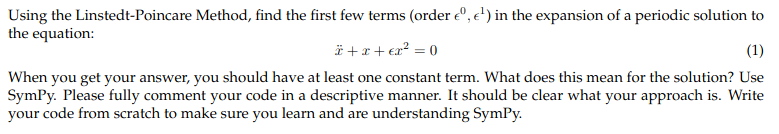

In [33]:
x = sm.Function('x')
x0 = sm.Function('x_0')
x1 = sm.Function('x_1')

t = sm.Symbol('t')
eps = sm.Symbol('epsilon')
omega = sm.Symbol('omega')

#Set up series expansion
x = x0(t) + eps*x1(t)
dt = (1+eps*omega)

expr = dt**2*x.diff(t,t) + x + eps*x**2 
sm.collect(sm.expand(expr),eps)

epsilon**3*(omega**2*Derivative(x_1(t), (t, 2)) + x_1(t)**2) + epsilon**2*(omega**2*Derivative(x_0(t), (t, 2)) + 2*omega*Derivative(x_1(t), (t, 2)) + 2*x_0(t)*x_1(t)) + epsilon*(2*omega*Derivative(x_0(t), (t, 2)) + x_0(t)**2 + x_1(t) + Derivative(x_1(t), (t, 2))) + x_0(t) + Derivative(x_0(t), (t, 2))

In [34]:
# Solve for O(1)
O_1 = sm.dsolve(x0(t) + x0(t).diff(t,t))
O_1

Eq(x_0(t), C1*sin(t) + C2*cos(t))

In [35]:
# Solve for O(eps)
x0 = O_1.rhs #extract x0 solution

#Solve for x1
O_eps = sm.dsolve(sm.simplify(2*omega*dt**2*x0 + x0**2 + x1(t) + dt**2*x1(t)), x1(t))
O_eps

Eq(x_1(t), (-2*C1*omega*(epsilon*omega + 1)**2*sin(t) - 2*C2*omega*(epsilon*omega + 1)**2*cos(t) - (C1*sin(t) + C2*cos(t))**2)/((epsilon*omega + 1)**2 + 1))

In [36]:
#Now a hiccup. We need to make sure we have no secular terms. By inspection, we can do this by setting $\omega$ = 0.
O_eps = O_eps.subs(omega, 0)
O_eps.simplify()

Eq(x_1(t), -(C1*sin(t) + C2*cos(t))**2/2)

In [37]:
#Now plug everything back into our expression for x:
xsoln = sm.Eq(0, x0 + eps*O_eps.rhs)
xsoln

Eq(0, C1*sin(t) + C2*cos(t) - epsilon*(C1*sin(t) + C2*cos(t))**2/2)

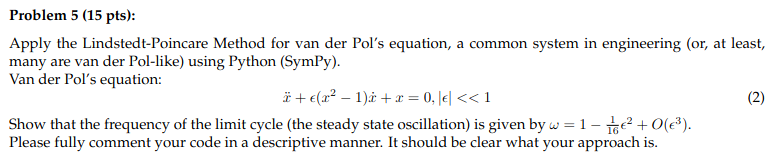

In [38]:
x = sm.Function('x')
x0 = sm.Function('x_0')
x1 = sm.Function('x_1')
x2 = sm.Function('x_2')

t = sm.Symbol('t')
eps = sm.Symbol('epsilon')
omega_1 = sm.Symbol('omega_1')
omega_2 = sm.Symbol('omega_2')

#Set up series expansion
x_expr = x0(t) + eps*x1(t) + eps**2*x2(t)
dt = (1+eps*omega_1+eps**2*omega_2)

expr = dt**2*x_expr.diff(t,t) + eps*(x_expr**2 - 1) * dt * x_expr.diff(t) + x_expr 
sm.collect(sm.expand(expr),eps)

epsilon**9*omega_2*x_2(t)**2*Derivative(x_2(t), t) + epsilon**8*(omega_1*x_2(t)**2*Derivative(x_2(t), t) + 2*omega_2*x_1(t)*x_2(t)*Derivative(x_2(t), t) + omega_2*x_2(t)**2*Derivative(x_1(t), t)) + epsilon**7*(2*omega_1*x_1(t)*x_2(t)*Derivative(x_2(t), t) + omega_1*x_2(t)**2*Derivative(x_1(t), t) + 2*omega_2*x_0(t)*x_2(t)*Derivative(x_2(t), t) + omega_2*x_1(t)**2*Derivative(x_2(t), t) + 2*omega_2*x_1(t)*x_2(t)*Derivative(x_1(t), t) + omega_2*x_2(t)**2*Derivative(x_0(t), t) + x_2(t)**2*Derivative(x_2(t), t)) + epsilon**6*(2*omega_1*x_0(t)*x_2(t)*Derivative(x_2(t), t) + omega_1*x_1(t)**2*Derivative(x_2(t), t) + 2*omega_1*x_1(t)*x_2(t)*Derivative(x_1(t), t) + omega_1*x_2(t)**2*Derivative(x_0(t), t) + omega_2**2*Derivative(x_2(t), (t, 2)) + 2*omega_2*x_0(t)*x_1(t)*Derivative(x_2(t), t) + 2*omega_2*x_0(t)*x_2(t)*Derivative(x_1(t), t) + omega_2*x_1(t)**2*Derivative(x_1(t), t) + 2*omega_2*x_1(t)*x_2(t)*Derivative(x_0(t), t) + 2*x_1(t)*x_2(t)*Derivative(x_2(t), t) + x_2(t)**2*Derivative(x_1(t)

In [39]:
#getting the first 3 orders:
eps_ords = sm.collect(sm.expand(expr),eps,evaluate=False)
eps_list= []
for order in range(3):
    eps_list.append(eps_ords[eps**order])
    print(f'\nOrder {order}: ')
    display(eps_list[order])
    


Order 0: 


x_0(t) + Derivative(x_0(t), (t, 2))


Order 1: 


2*omega_1*Derivative(x_0(t), (t, 2)) + x_0(t)**2*Derivative(x_0(t), t) + x_1(t) - Derivative(x_0(t), t) + Derivative(x_1(t), (t, 2))


Order 2: 


omega_1**2*Derivative(x_0(t), (t, 2)) + omega_1*x_0(t)**2*Derivative(x_0(t), t) - omega_1*Derivative(x_0(t), t) + 2*omega_1*Derivative(x_1(t), (t, 2)) + 2*omega_2*Derivative(x_0(t), (t, 2)) + x_0(t)**2*Derivative(x_1(t), t) + 2*x_0(t)*x_1(t)*Derivative(x_0(t), t) + x_2(t) - Derivative(x_1(t), t) + Derivative(x_2(t), (t, 2))

In [40]:
#Solve 0th order
ord_0 = sm.dsolve(eps_list[0],x0(t))
display(ord_0)

Eq(x_0(t), C1*sin(t) + C2*cos(t))

In [41]:
#Solve 1st Order
ord_1 = sm.dsolve(eps_list[1].subs(x0(t),ord_0.rhs),x1(t))
display(ord_1.simplify())

Eq(x_1(t), -C1*(C1**2 - 3*C2**2)*cos(t)**3/8 + (3*C1**3 - C1**2*C2*t - 9*C1*C2**2 - 8*C1*omega_1*t - C2**3*t + 4*C2*t + 8*C3)*cos(t)/8 + (-C1**3*t + 4*C1**2*C2 - C1*C2**2*t + 8*C1*omega_1 + 4*C1*t + 8*C2*omega_1*t + C2*(3*C1**2 - C2**2)*cos(t)**2 - 4*C2 + 8*C4)*sin(t)/8)

In [42]:
#Collect t terms to solve for omega
ord_1_terms = sm.collect(sm.expand(ord_1.rhs), t, evaluate=False)

#Solve for omega that makes that t term equal to 0.
omega_1_soln = sm.solve(sm.Eq(0,ord_1_terms[t]), omega_1)
omega_1_soln

[(-C1**3*sin(t) - C1**2*C2*cos(t) - C1*C2**2*sin(t) + 4*C1*sin(t) - C2**3*cos(t) + 4*C2*cos(t))/(8*(C1*cos(t) - C2*sin(t)))]

In [43]:
#Plug this solved omega_1 back into our expression for the order 1 terms
ord_1 = sm.simplify(ord_1.subs(omega_1, list(omega_1_soln)[0]))
ord_1
print(ord_1)

Eq(x_1(t), (-C1**4*cos(2*t)**2 + 6*C1**4*cos(2*t) + 3*C1**4 + 4*C1**3*C2*sin(2*t) + 2*C1**3*C2*sin(4*t) + 6*C1**2*C2**2*cos(2*t)**2 - 2*C1**2*C2**2*cos(2*t) - 28*C1**2*C2**2 - 8*C1**2*cos(2*t) + 8*C1**2 + 12*C1*C2**3*sin(2*t) - 2*C1*C2**3*sin(4*t) + 16*C1*C3*cos(2*t) + 16*C1*C3 + 16*C1*C4*sin(2*t) - C2**4*cos(2*t)**2 + C2**4 - 8*C2**2*cos(2*t) + 8*C2**2 - 16*C2*C3*sin(2*t) + 16*C2*C4*cos(2*t) - 16*C2*C4)/(32*C1*cos(t) - 32*C2*sin(t)))


In [44]:
#Again for order 2
ord_2 = sm.simplify(sm.dsolve(eps_list[2].subs({x1(t): ord_1.rhs), x0(t): ord_0.rhs},x2(t)))
ord_2
print(ord_2)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '{' (3522621134.py, line 2)

In [ ]:
#Collect t terms to solve for omega_2
ord_2_temrs = sm.collect(sm.expand(ord_w.rhs), t, evaluate=False)

#Solve for omega_2 that makes that t term equal to 0.
omega_2_soln = sm.solve(sm.Eq(0,ord_2_terms[t]), omega_2)
omega_2_soln

In [ ]:
#Plug this solved omega_2 back into the expression for the order 2 terms:
ord_2 = sm.simplify(ord_2.subs(omega_2, list(omega_2_soln)[0]))
ord_2
print(ord_2)

In [ ]:
x_soln = sm.Eq(x(t), ord_0.rhs + eps*ord_1.rhs + eps**2*ord_2.rhs